<a href="https://colab.research.google.com/github/Matilda045/California_Housing_RegressionPrediction/blob/main/California_Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUILDING A PREDICTIVE MODEL FOR CALIFORNIA HOUSING PRICES**

### **Problem Statement**

This project aims to develop a machine learning model to predict the median house value in different regions of California using attributes like number of rooms, median age of the house, and income levels.

### **Dataset Source / Description**

The data was obtained from Kaggle website, the dataset provides demographic and housing market data from the different districts in California which includes:

longitude: The longitude value for the block, these are geographical coordinate (West-East position).

latitude: The latitude value for the block, these are geographical coordinate (North-South position).

housing_median_age: The median age of the houses in a given block.

total_rooms: Total number of rooms in all houses in the block.

total_bedrooms: Total number of bedrooms in all houses in a block.

population: Total population in a block.

households: Total number of households in a block.

median_income: Median of the total household income of all the houses in a block.

ocean_proximity: representing the location relative to the ocean (e.g., NEAR BAY, INLAND, NEAR OCEAN).

median_house_value: The median of the household prices of all the houses in a block.

Districts or block groups are the smallest geaographical units for which the United States Census Bureau publishes sample data ( a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

import pickle
from google.colab import files

## **Data Loading and Initial Exploration**

In [7]:
# Creating the dataframe

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/California_housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [8]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [9]:
# Getting a brief information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## **CHECKING THE DATA FOR IRREGULARITIES**

The data set comprises of 20,640 rows and 10 columns, however, it was observed that all of the data was not completely filled with the data, hence, there is need to either refill or drop the rows and columns that are blank in the dataset.

In [10]:
# Checking for null value rows, the code returns true if the row is null or balank and returns false if the row is not blank

df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [11]:
# # shows the number of missing values per column

df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [12]:
# shows the total number of empty rows

df.isnull().any(axis=1).sum()

207

In [13]:
# shows the total number of duplicated rows

df.duplicated().sum()

0

In [14]:
# dropping row that are empty

df.dropna(inplace=True)

In [15]:
# testing to see the new the total number of empty rows

df.isnull().any(axis=1).sum()

0

In [16]:
# testing to see the number of missing values per column

df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


## **Exploratory Data Analysis**

In [17]:
# Summary statistics


df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7acd37622650>,
 'caps': [<matplotlib.lines.Line2D at 0x7acd3764b0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acd39631610>],
 'medians': [<matplotlib.lines.Line2D at 0x7acd37654090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acd37654a50>],
 'means': []}

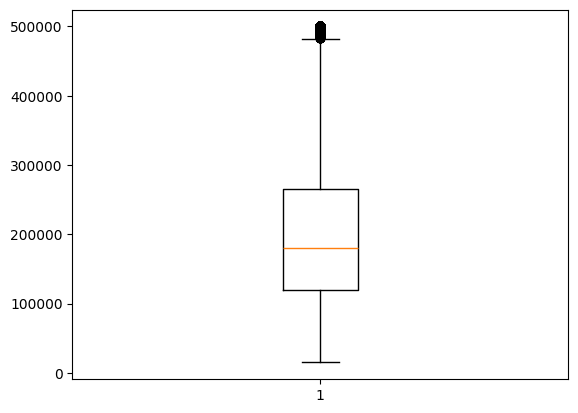

In [ ]:
plt.boxplot(df["median_house_value"])

In [22]:
# Co-relation analysis
df[["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value" ]].corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

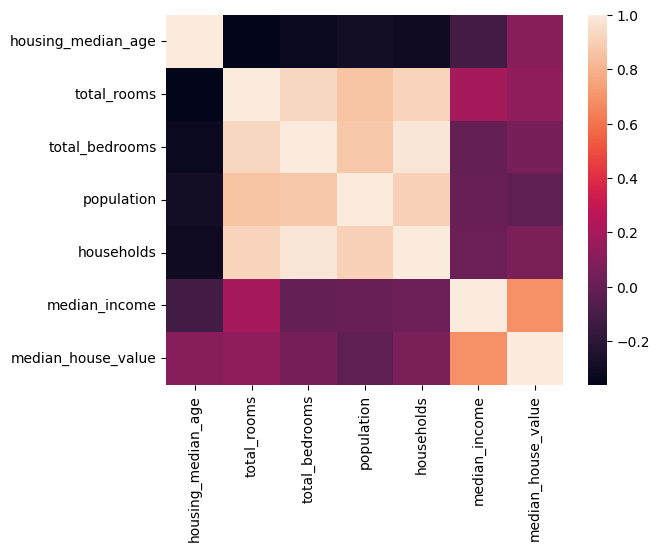

In [23]:
# Create the heatmap using the correlation matrix

correlation_matrix = df[["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value" ]].corr()
sns.heatmap(correlation_matrix)

In [26]:
# correlation analysis of selected columns in the dataset

df[["housing_median_age", "total_rooms", "median_income", "median_house_value"]].corr()

,housing_median_age,total_rooms,median_income,median_house_value
housing_median_age,1.000000,-0.360628,-0.118278,0.106432
total_rooms,-0.360628,1.000000,0.197882,0.133294
median_income,-0.118278,0.197882,1.000000,0.688355
median_house_value,0.106432,0.133294,0.688355,1.000000


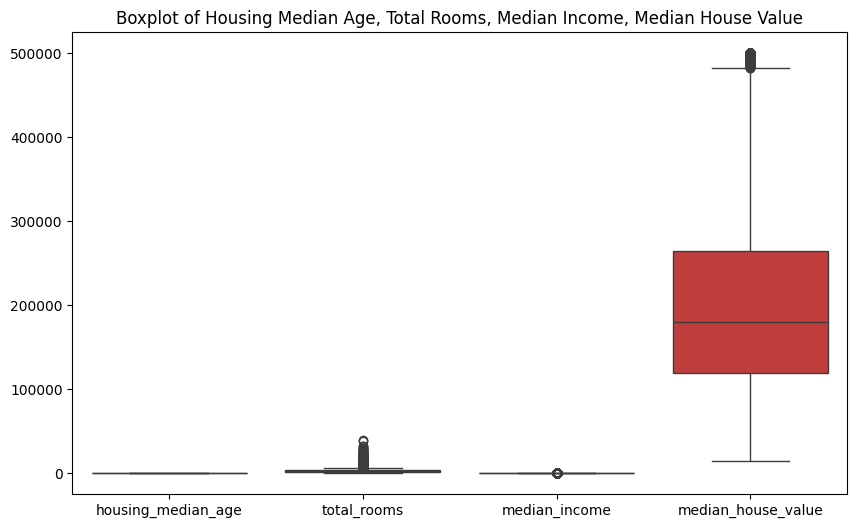

In [30]:
# Boxplot of specified columns
# Boxplot of specified columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["housing_median_age", "total_rooms", "median_income", "median_house_value"]])
plt.title("Boxplot of Housing Median Age, Total Rooms, Median Income, Median House Value")
plt.show()

In [31]:
for column in df[["housing_median_age", "total_rooms", "median_income", "median_house_value"]]:

  # STEP 1: calculate 25th and 75th percentiles
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  # print(Q1, Q3)

  # STEP 2: calculate InterQuartile Range
  IQR = Q3 - Q1

  # STEP 3: calculate upper and lower bounds
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  # STEP 4: Floor outliers (replace outlier values with upper_bound and low_bound values)
  # flooring outliers above upper bound
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  # flooring outliers below lower bound
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

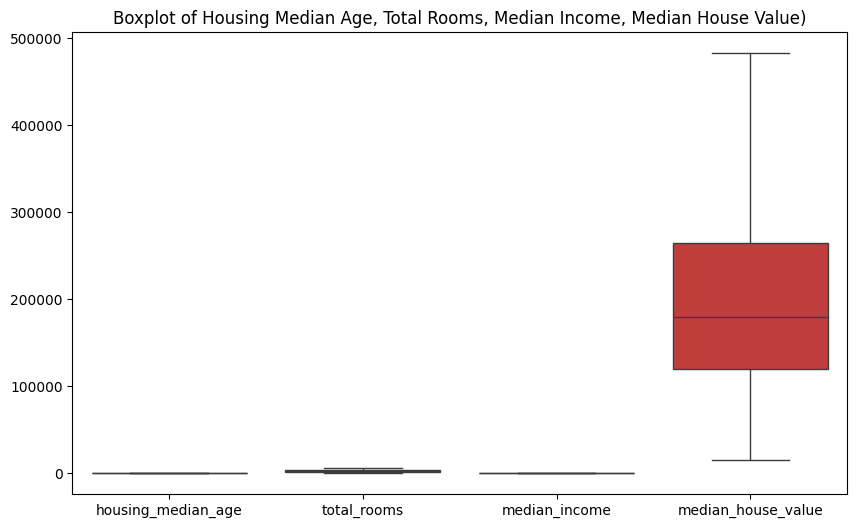

In [32]:
# Boxplot of specified columns to check removal of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["housing_median_age", "total_rooms", "median_income", "median_house_value"]])
plt.title("Boxplot of Housing Median Age, Total Rooms, Median Income, Median House Value)")
plt.show()

# **Decide on Most Appropriate Machine Learning Model**


A Multi-linear regression model will be used since we are using multiple columns for the feature matrix

In [33]:
# trimming the data to relevant columns

model_df = df[["housing_median_age", "total_rooms", "median_income", "median_house_value"]]
model_df

,housing_median_age,total_rooms,median_income,median_house_value
0,41.0,880.0,8.01445,452600.0
1,21.0,5682.5,8.01445,358500.0
2,52.0,1467.0,7.25740,352100.0
3,52.0,1274.0,5.64310,341300.0
4,52.0,1627.0,3.84620,342200.0
...,...,...,...,...
20635,25.0,1665.0,1.56030,78100.0
20636,18.0,697.0,2.55680,77100.0
20637,17.0,2254.0,1.70000,92300.0
20638,18.0,1860.0,1.86720,84700.0


In [34]:
# divide data into feature matrix and target vector

feature = ["housing_median_age", "total_rooms", "median_income"] # square brackets, since its a matrix
target = "median_house_value"

X = model_df[feature] # model_df[["housing_median_age", "total_rooms", "median_income"]]
y = model_df[target]

In [38]:
# dividing data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Create Model and Evaluate Its Performance [Cross Validation]**

### **Create And Evaluate Baseline Performance**

In [39]:
# create baseline
kf = 5

baseline = DummyRegressor(strategy="mean")

baseline_mae = -cross_val_score(baseline, X, y, cv=kf, scoring="neg_mean_absolute_error").mean().round(3)

baseline_mae

91473.214


**Create And Evaluate Model Performance**



In [40]:
# create model
model1 = LinearRegression()

model1_mae = -cross_val_score(model1, X, y, cv=kf, scoring="neg_mean_absolute_error").mean().round(3)

model1_mae

60386.024

# **Create Model and Evaluate Its Performance (Holdout)**

**Baselining**

In [41]:
# Let's create a baseline model

baseline_model = y_train.mean()

baseline_model

206410.67587219464

In [42]:
# let's create predictions using the baseline model

# baseline_pred =

baseline_pred = [baseline_model] * len(y_test)

baseline_pred

[206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587219464,
 206410.67587


### **Evaluate Baseline Performance**

MAE [Mean Absolute Error] evaluation metric will be used.

In [43]:
# MAE for baseline model

baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("The mean value of y_train values is:", round(baseline_model, 2))
print("The baseline MAE is:", round(baseline_mae, 2))

The mean value of y_train values is: 206410.68
The baseline MAE is: 90638.55


### **Build and Evaluate Model**

**Create a MultiLinear Regression Model**

In [44]:
# let's create a linear regression model

model = LinearRegression()
model

LinearRegression()

### **Model Fitting (Training)**

In [45]:
# to fit a model means to train it using the X_train and y_train values

model.fit(X_train, y_train)

LinearRegression()

**Test Model With Training Data**

In [46]:
# we'd generate predictions using X_train

model_train_pred = model.predict(X_train)

model_train_pred

array([112225.33216252, 113925.27906337, 266982.60731007, ...,
       195447.72704934, 264002.73343066, 268988.26217865])

**Evaluate Model Perfomance I**

In [47]:
# Calculate model MAE for training data

model_train_mae = mean_absolute_error(y_train, model_train_pred)

round(model_train_mae, 3)

58940.651

### **Compare Baseline MAE with Model's training MAE**

In [48]:
# print baseline and model (train) mae to compare both

print("The baseline |MAE is:\t\t", round(baseline_mae, 3))
print("The model (train) MAE is:\t", round(model_train_mae, 3))

The baseline |MAE is:		 90638.552
The model (train) MAE is:	 58940.651


### **Test Model With Testing Data**

In [49]:
# model generates predictions off X_test values

model_test_pred = model.predict(X_test)

model_test_pred

array([147705.73234193, 204020.63291209, 192466.81785696, ...,
       215318.27682585, 158462.96437952, 154395.8830196 ])

**Evaluate Model Perfomance II**

In [50]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(y_test, model_test_pred)

round(model_test_mae, 3)

59434.914

### **Compare Baseline MAE, Model testing MAE and Model training MAE**

In [51]:
# print baseline model (train) and model (test) MAEs to compare the three of them

print("The baseline MAE is:\t\t", round(baseline_mae, 3))
print("The model (train) MAE is:\t", round(model_train_mae, 3))
print("The model (test) MAE is:\t", round(model_test_mae, 3))

The baseline MAE is:		 90638.552
The model (train) MAE is:	 58940.651
The model (test) MAE is:	 59434.914


# **Model Deployment**

**Saving the Model using Pickle**

In [ ]:
with open("model.pkl", "wb") as f:
  pickle.dump(model, f)

In [ ]:
# check if model.pkl was created

!ls

drive  model.pkl  sample_data


**Save model.pkl to local drive**

In [ ]:
# saving model.pkl to computer drive

files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Save file containing Streamlit code to local drive**

In [ ]:
# streamlit code

%%writefile app.py

import pickle
import streamlit as st
import pandas as pd


# load the file that contains the model (model.pkl)
with open("model.pkl", "rb") as f:
  model = pickle.load(f)

# give the Streamlit app page a title
st.title("Housing Predictor")

# Input widgets for getting user values for X (feature matrix value)

housing_median_age = st.slider("housing_median_age", min_value=0, max_value=100, value=20)

# Changed to number input
total_rooms = st.number_input("total_rooms", min_value=0, max_value=40000, value=100)
median_income = st.number_input("median_income", min_value=0.0, max_value=100.0, value=20.0)

ocean_proximity = st.slider("ocean_less_than_1H_ocean", min_value=0, max_value=1, value=1)

# After selecting features, the user then submits the median house value
if st.button("Predict"):
  # take the house value, and format the value the right way
  prediction = model.predict([[housing_median_age, total_rooms, median_income]])[0].round(2)
  st.write("The predicted median house value is", prediction, "dollars")

Writing app.py


In [ ]:
# check if app.py has been created on google drive

!ls

app.py	drive  model.pkl  sample_data


In [ ]:
# download app.py to local directory

files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Requirements file**

This file should contain a list of libraries imported and used in the app.py script. This helps the Streamlit engine to download the libraries so they can be used in the application.

In [ ]:
# creating the requirements.txt file

%%writefile requirements.txt
pickle4
streamlit
pandas
scikit-learn

Writing requirements.txt


In [ ]:
# download the requirements.txt

files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>